!Python Project
Multiple Linear Regression - Predicting CO2 Emission for Cars
given their various features

In [0]:
# Importing required libraries
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Downloading the data
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv


--2020-06-14 06:16:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2020-06-14 06:16:08 (2.83 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [0]:
# Reading the data
df = pd.read_csv("FuelConsumption.csv")

# Understanding the data
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


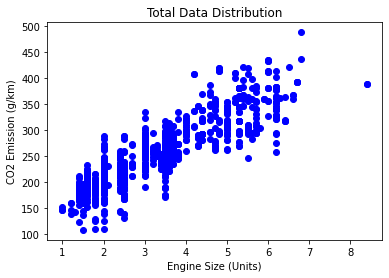

In [0]:
# Selecting the features that we need to use for Regression
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

# Plotting EngineSize against Emission values
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = "blue")
plt.title("Total Data Distribution")
plt.xlabel("Engine Size (Units)")
plt.ylabel("CO2 Emission (g/km)")

plt.show()

In [0]:
# Creating train and test dataset. 
# Using 80% of data as training while 20% of data as test data
rands = np.random.rand(len(cdf)) 
msk = rands < 0.8
train, test = cdf[msk], cdf[~msk]

print(train, test)

      ENGINESIZE  CYLINDERS  ...  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4  ...                   8.5           196
1            2.4          4  ...                   9.6           221
2            1.5          4  ...                   5.9           136
3            3.5          6  ...                  11.1           255
4            3.5          6  ...                  10.6           244
...          ...        ...  ...                   ...           ...
1062         3.0          6  ...                  11.8           271
1063         3.2          6  ...                  11.5           264
1064         3.0          6  ...                  11.8           271
1065         3.2          6  ...                  11.3           260
1066         3.2          6  ...                  12.8           294

[861 rows x 6 columns]       ENGINESIZE  CYLINDERS  ...  FUELCONSUMPTION_COMB  CO2EMISSIONS
5            3.5          6  ...                  10.0           230
8         

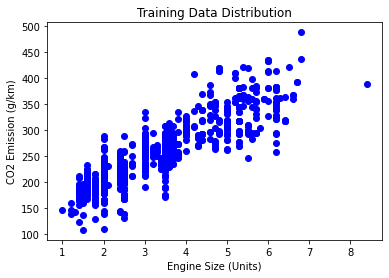

In [0]:
# Plotting the Training Data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.title("Training Data Distribution")
plt.xlabel("Engine Size (Units)")
plt.ylabel("CO2 Emission (g/km)")

plt.show()

Applying the Multiple Linear Regression Model.
Sklearn uses OLS to calculate the pramaters for the "Hyperplane of Best Fit"

In [0]:
from sklearn import linear_model
regression_model = linear_model.LinearRegression()

# specifying features and targets
x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
y = np.asanyarray(train[["CO2EMISSIONS"]])

# Fitting a line into plane of features
regression_model.fit(x, y)

# Coefficients 
# print("Parameter: {}{}{}".format([x for x in regression_model.coef_]))
print("Intercept: {:.2f}".format(regression_model.intercept_[0]))

Intercept: 64.95


Prediction on Test Data

In [0]:
y_hat = regression_model.predict(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

Evaluation 


In [0]:
# Evaluation Metric MSSR
print("Mean Sum of Residual Squares: {:.2f}".format(np.mean((y_hat - y)**2)))

# Explained variance score: 1 signifies perfect prediction
print("explained variance: {:.2f}".format(regression_model.score(x, y)))

Mean Sum of Residual Squares: 521.16
explained variance: 0.87


Our model is 87% accurate

**PRACTICE TIME**
Trying to use a multiple linear regression with the same dataset but this time using __FUEL CONSUMPTION in CITY__ and __FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. 

